THIS USES CONDITIONAL NODE 

In [11]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [12]:
class agentState(TypedDict):
    number1 : int 
    number2 : int 
    operation : str
    result : int

In [13]:
def adder(state: agentState) -> agentState:
    state["result"] = state["number1"] + state["number2"]
    return state

def sub(state: agentState) -> agentState:
    state["result"] = state["number1"] - state["number2"]
    return state

# Decider node
def decide_next_node(state: agentState) -> agentState:
    if state["operation"] == "+":
        return "addition_operation" # Edge to addition node 
    
    elif state["operation"] == "-":
        return "subtraction_operation" # Edge to subtraction node 
    
    


In [14]:
graph =  StateGraph(agentState)

graph.add_node("adder", adder)
graph.add_node("subtractor", sub)
graph.add_node("decider", lambda state: state) # You input state is passed as it is to output 

graph.add_edge(START, "decider")
graph.add_conditional_edges(
    "decider",
    decide_next_node,
    {
        # Edge name : Node name
        "addition_operation" : "adder", 
        "subtraction_operation" : "subtractor"
    }
)
graph.add_edge("adder", END)
graph.add_edge("subtractor", END)

app = graph.compile()



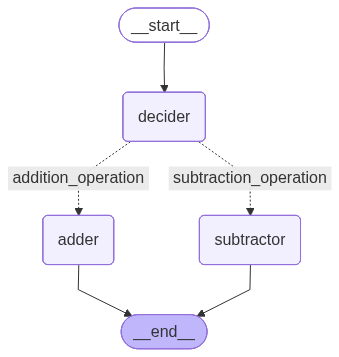

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
result = app.invoke({
    "number1" : 10,
    "number2" : 5,
    "operation" : "+"
})

result["result"]

15